In [19]:
# Analysis and Mathematical  Libraries
import numpy as np

import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt

In [2]:
#training data 
a= pd.read_csv("train.csv")
a.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
#testing data
b = pd.read_csv("test.csv")
b.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [4]:
a.dropna(inplace = True)
b.dropna(inplace = True)

In [5]:
df=a.copy(deep=True)
df_test=b.copy(deep=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.0 KB


In [8]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[-8.99096176e-01 -9.76005188e-01]
 [-4.94443564e-04 -8.50994615e-02]
 [-1.21015062e+00 -1.12488919e+00]
 ...
 [ 1.10547692e+00  1.32918680e+00]
 [ 5.52491238e-01  4.71281403e-01]
 [ 1.62390100e+00  1.54822594e+00]]


In [9]:
scaled_test = scaler.fit_transform(df_test)
print(scaled_test)

[[ 0.91589319  0.98439558]
 [-1.05200623 -0.9657094 ]
 [-1.01686517 -0.88191435]
 [-1.08714729 -1.14900861]
 [-0.52489032 -0.32233713]
 [-1.2628526  -1.42644914]
 [ 0.38877727  0.26425977]
 [ 1.54843229  1.59917669]
 [-1.08714729 -1.13048056]
 [-1.61426321 -1.46291979]
 [-1.64940427 -1.6674243 ]
 [-1.12228835 -1.1752642 ]
 [ 1.58357335  1.51411084]
 [ 0.38877727  0.35085828]
 [-0.52489032 -0.37756395]
 [-1.2628526  -1.25357752]
 [ 0.49420046  0.54277725]
 [-1.29799366 -1.19112379]
 [ 1.2673038   1.35927033]
 [ 0.6347647   0.89669524]
 [ 1.33758592  1.40971053]
 [ 0.0022256  -0.14785432]
 [ 1.33758592  1.33071389]
 [-0.84115987 -1.0161341 ]
 [ 1.61871441  1.59208345]
 [ 0.24821303  0.20022964]
 [ 0.98617531  0.93393259]
 [-1.05200623 -1.10510818]
 [ 1.47815017  1.44126383]
 [-0.84115987 -0.84808384]
 [ 1.68899653  1.59688942]
 [-0.70059562 -0.68117738]
 [-0.6303135  -0.55396789]
 [ 1.02131637  0.94426436]
 [-0.8060188  -0.6248124 ]
 [-0.13833864  0.01704237]
 [ 0.07250772  0.08328919]
 

In [10]:
# convert the array back to a dataframe
dataset = pd.DataFrame(scaled)
dataset

,0,1
0,-0.899096,-0.976005
1,-0.000494,-0.085099
2,-1.210151,-1.124889
3,-0.415234,-0.459065
4,1.278285,1.283987
...,...,...
694,0.275998,0.297546
695,1.485655,1.536188
696,1.105477,1.329187
697,0.552491,0.471281


In [11]:
# convert the array back to a dataframe
scaled_test = pd.DataFrame(scaled_test)
scaled_test

,0,1
0,0.915893,0.984396
1,-1.052006,-0.965709
2,-1.016865,-0.881914
3,-1.087147,-1.149009
4,-0.524890,-0.322337
...,...,...
295,0.705047,0.597486
296,-0.173480,-0.133349
297,0.142790,0.099424
298,0.388777,0.416639


In [12]:
dataset = dataset.rename(columns = {0: 'X', 1: 'Y'})
scaled_test=scaled_test.rename(columns = {0: 'x', 1: 'y'})

In [13]:
x_train = dataset.iloc[:,0].values.reshape(-1,1)
y_train = dataset.iloc[:,1].values.reshape(-1,1)

x_test = scaled_test.iloc[:,0].values.reshape(-1,1)
y_test = scaled_test.iloc[:,1].values.reshape(-1,1)

In [29]:
from sklearn import linear_model
linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)


LinearRegression()

In [28]:
# predicting test data on trained model
data = linear.predict(x_test)
acc = linear.score(y_test,data)
print(acc)

0.9890906074287029


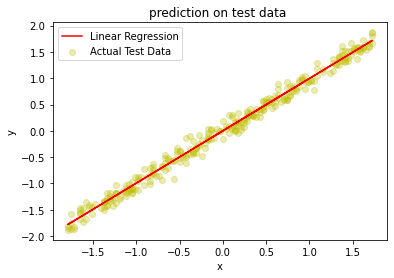

In [26]:
# ploting the prediction of test data
plt.title('prediction on test data ')
plt.plot(x_test, data, label='Linear Regression', color='r')
plt.scatter(x_test, y_test, label='Actual Test Data', color='y',alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()